In [63]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MultiLabelBinarizer, OneHotEncoder

# Model Selection & Oversampling
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_recall_fscore_support,hamming_loss
from sklearn.metrics.pairwise import cosine_similarity


In [64]:
df = pd.read_csv("Food_and_Nutrition.csv", encoding="ISO-8859-1")
df.head()

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat,Breakfast Suggestion,Lunch Suggestion,Dinner Suggestion,Snack Suggestion,Disease
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,2020,250,30.0,60,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit,Weight Gain
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,1480,200,24.0,40,Tofu scramble with veggies,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Apple with almond butter,"Weight Gain, Hypertension, Heart Disease"
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,2185,300,36.0,65,Tofu and veggie breakfast burrito,Black bean burger on a whole wheat bun,Lentil and vegetable curry,Trail mix,Weight Gain
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,2680,350,42.0,80,Greek yogurt with granola and fruit,Chicken and vegetable stir-fry,Turkey chili with brown rice,Banana with peanut butter,Weight Gain
4,62,Male,170,85,Sedentary,Vegetarian,2000,80,125.0,16.0,1815,250,30.0,55,Scrambled eggs with whole wheat toast and avocado,Quinoa salad with chickpeas and vegetables,Vegetarian chili with cornbread,Fruit and nut mix,Weight Gain


In [65]:
df.info

<bound method DataFrame.info of       Ages  Gender  Height  Weight     Activity Level Dietary Preference  \
0       25    Male     180      80  Moderately Active           Omnivore   
1       32  Female     165      65     Lightly Active         Vegetarian   
2       48    Male     175      95          Sedentary              Vegan   
3       55  Female     160      70        Very Active           Omnivore   
4       62    Male     170      85          Sedentary         Vegetarian   
...    ...     ...     ...     ...                ...                ...   
1693    53  Female     182      76          Sedentary              Vegan   
1694    38    Male     150      76        Very Active              Vegan   
1695    57    Male     165      73        Very Active              Vegan   
1696    40    Male     166      91   Extremely Active              Vegan   
1697    54  Female     198      75          Sedentary         Vegetarian   

      Daily Calorie Target  Protein  Sugar  Sodium  Cal

In [66]:
df.duplicated().sum()

0

In [67]:
df.isnull().sum()

Ages                    0
Gender                  0
Height                  0
Weight                  0
Activity Level          0
Dietary Preference      0
Daily Calorie Target    0
Protein                 0
Sugar                   0
Sodium                  0
Calories                0
Carbohydrates           0
Fiber                   0
Fat                     0
Breakfast Suggestion    0
Lunch Suggestion        0
Dinner Suggestion       0
Snack Suggestion        0
Disease                 0
dtype: int64

In [68]:
df.describe

<bound method NDFrame.describe of       Ages  Gender  Height  Weight     Activity Level Dietary Preference  \
0       25    Male     180      80  Moderately Active           Omnivore   
1       32  Female     165      65     Lightly Active         Vegetarian   
2       48    Male     175      95          Sedentary              Vegan   
3       55  Female     160      70        Very Active           Omnivore   
4       62    Male     170      85          Sedentary         Vegetarian   
...    ...     ...     ...     ...                ...                ...   
1693    53  Female     182      76          Sedentary              Vegan   
1694    38    Male     150      76        Very Active              Vegan   
1695    57    Male     165      73        Very Active              Vegan   
1696    40    Male     166      91   Extremely Active              Vegan   
1697    54  Female     198      75          Sedentary         Vegetarian   

      Daily Calorie Target  Protein  Sugar  Sodium  C

In [69]:
# Looking at Target Column ('Disease')
print(df['Disease'].value_counts())

Weight Gain                                                                 1312
Weight Gain, Hypertension, Heart Disease                                     129
Weight Gain, Kidney Disease                                                   91
Weight Gain, Hypertension, Heart Disease, Kidney Disease                      82
Diabetes, Acne, Weight Gain, Hypertension, Heart Disease                      45
Diabetes, Acne, Hypertension, Heart Disease                                   14
Hypertension, Heart Disease                                                    9
Diabetes, Acne, Weight Gain, Hypertension, Heart Disease, Kidney Disease       5
Hypertension, Heart Disease, Kidney Disease                                    4
Kidney Disease                                                                 3
Hypertension, Kidney Disease                                                   2
Diabetes, Acne, Hypertension, Kidney Disease                                   1
Diabetes, Acne, Weight Loss,

In [70]:

# Creating a copy of the original data to avoid modifying it
data_exploded = df.copy()

# Spliting the 'Disease' column into multiple labels
data_exploded['Disease'] = data_exploded['Disease'].str.split(', ')

# Explode the 'Disease' column into separate rows
data_exploded = data_exploded.explode('Disease')

# Counting the frequency of each disease
disease_counts = data_exploded['Disease'].value_counts()
display(disease_counts)

common_diseases = disease_counts.index 

Weight Gain       1664
Hypertension       292
Heart Disease      289
Kidney Disease     189
Diabetes            66
Acne                66
Weight Loss          1
Name: Disease, dtype: int64

In [71]:
disease_counts = data_exploded['Disease'].value_counts()

# Create a bar plot using Plotly
fig = px.bar(
    x=disease_counts.index,
    y=disease_counts.values,
    labels={'x': 'Disease', 'y': 'Frequency'},
    title="Frequency of Diseases",
    text_auto=True
)

# Adjust layout for better readability
fig.update_layout(
    xaxis_title="Disease",
    yaxis_title="Frequency",
    xaxis_tickangle=45  # Rotate labels for readability
)

# Show the plot
fig.show()


In [72]:
# Generating binary columns for each disease (0 or 1) one-hot encoding
for disease in common_diseases:
    data_exploded[disease] = (data_exploded['Disease'] == disease).astype(int)

display(data_exploded.head())

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,...,Dinner Suggestion,Snack Suggestion,Disease,Weight Gain,Hypertension,Heart Disease,Kidney Disease,Diabetes,Acne,Weight Loss
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,...,Salmon with roasted vegetables,Greek yogurt with fruit,Weight Gain,1,0,0,0,0,0,0
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,...,Vegetable stir-fry with brown rice,Apple with almond butter,Weight Gain,1,0,0,0,0,0,0
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,...,Vegetable stir-fry with brown rice,Apple with almond butter,Hypertension,0,1,0,0,0,0,0
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,...,Vegetable stir-fry with brown rice,Apple with almond butter,Heart Disease,0,0,1,0,0,0,0
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,...,Lentil and vegetable curry,Trail mix,Weight Gain,1,0,0,0,0,0,0


In [73]:
# Load the dataset
df = pd.read_csv('Food_and_Nutrition.csv')

# Select relevant columns
df = df[['Weight', 'Activity Level', 'Dietary Preference', 'Daily Calorie Target', 'Disease']]

# Split the Disease column into lists of diseases
df['Disease'] = df['Disease'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

# Transform the Disease column into a binary matrix
mlb = MultiLabelBinarizer()
disease_matrix = mlb.fit_transform(df['Disease'])
disease_df = pd.DataFrame(disease_matrix, columns=mlb.classes_)

# Combine with original features
df = df.drop(columns=['Disease'])
df = pd.concat([df, disease_df], axis=1)

# Encode categorical columns using one-hot encoding
df = pd.get_dummies(df, columns=['Activity Level', 'Dietary Preference'], drop_first=True)

# Split into features and targets
X = df.drop(columns=mlb.classes_)
y = df[mlb.classes_]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
base_model = RandomForestClassifier(random_state=42, class_weight='balanced')
model = MultiOutputClassifier(base_model)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [74]:
def make_prediction(weight, activity_level, dietary_preference, calorie_target):
    #  Prepare the input as a DataFrame with proper columns
    input_data = pd.DataFrame({
        'Weight': [weight],
        'Daily Calorie Target': [calorie_target],
        'Activity Level': [activity_level],
        'Dietary Preference': [dietary_preference]
    })

    # One-hot encode the input to match training data
    input_encoded = pd.get_dummies(input_data, columns=['Activity Level', 'Dietary Preference'], drop_first=True)

    # Ensure all necessary columns are present (add missing columns with 0 values)
    for col in X.columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0
    input_encoded = input_encoded[X.columns]  # Ensure column order matches training data

    # Make a prediction using the trained model
    prediction = model.predict(input_encoded)

    # Interpret the prediction
    predicted_diseases = [mlb.classes_[i] for i, val in enumerate(prediction[0]) if val == 1]

    return predicted_diseases

# Example Usage: Give the values and get the predicted diseases
sample_weight = 70  # Example weight
sample_activity_level = 'Moderate'  # Example activity level
sample_dietary_preference = 'Vegetarian'  # Example dietary preference
sample_calorie_target = 2000  # Example calorie target

predicted_diseases = make_prediction(sample_weight, sample_activity_level, sample_dietary_preference, sample_calorie_target)
print(f"Predicted Diseases: {predicted_diseases}")


Predicted Diseases: ['Weight Gain']



Random Forest Model Performance:
Overall Accuracy: 0.78
Hamming Loss: 0.05
Macro-averaged Precision: 0.70
Macro-averaged Recall: 0.56
Macro-averaged F1 Score: 0.61

Acne - Precision: 1.00, Recall: 0.93, F1 Score: 0.97

Diabetes - Precision: 1.00, Recall: 0.93, F1 Score: 0.97

Heart Disease - Precision: 0.84, Recall: 0.45, F1 Score: 0.59

Hypertension - Precision: 0.82, Recall: 0.44, F1 Score: 0.57

Kidney Disease - Precision: 0.24, Recall: 0.15, F1 Score: 0.19

Weight Gain - Precision: 0.99, Recall: 1.00, F1 Score: 1.00

Weight Loss - No true samples in test set, skipping metrics.

Classification Report:
                precision    recall  f1-score   support

          Acne       1.00      0.93      0.97        15
      Diabetes       1.00      0.93      0.97        15
 Heart Disease       0.84      0.45      0.59        60
  Hypertension       0.82      0.44      0.57        61
Kidney Disease       0.24      0.15      0.19        33
   Weight Gain       0.99      1.00      1.00     

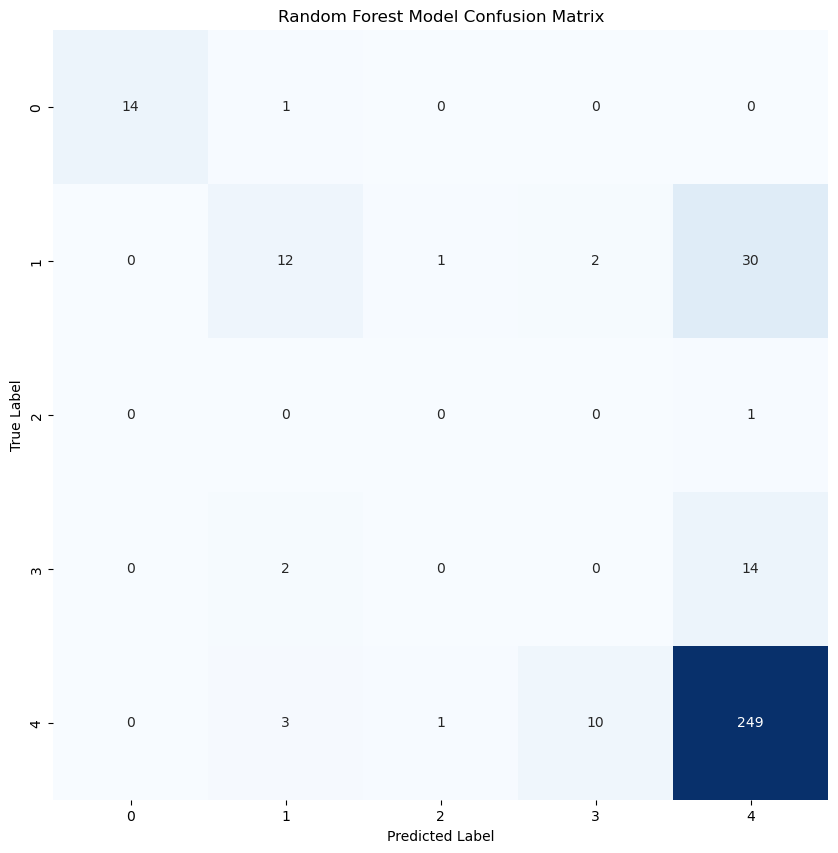

(0.7823529411764706,
 0.052941176470588235,
 array([1.        , 1.        , 0.84375   , 0.81818182, 0.23809524,
        0.99406528, 0.        ]),
 array([0.93333333, 0.93333333, 0.45      , 0.44262295, 0.15151515,
        1.        , 0.        ]),
 array([0.96551724, 0.96551724, 0.58695652, 0.57446809, 0.18518519,
        0.99702381, 0.        ]),
 0.699156048310881,
 0.5586863955716415,
 0.6106668691875898)

In [75]:

def evaluate_model(name, y_test, y_pred, mlb_classes):
    # Step 1: Calculate Overall Metrics
    accuracy = accuracy_score(y_test, y_pred)
    hamming = hamming_loss(y_test, y_pred)
    macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(
        y_test, y_pred, average="macro", zero_division=0
    )
    
    # Step 2: Print Overall Metrics
    print(f"\n{name} Model Performance:")
    print(f"Overall Accuracy: {accuracy:.2f}")
    print(f"Hamming Loss: {hamming:.2f}")
    print(f"Macro-averaged Precision: {macro_precision:.2f}")
    print(f"Macro-averaged Recall: {macro_recall:.2f}")
    print(f"Macro-averaged F1 Score: {macro_f1:.2f}")
    
    # Step 3: Per-label Metrics
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_pred, average=None, zero_division=0
    )
    for i, disease in enumerate(mlb_classes):
        if y_test[disease].sum() == 0:
            print(f"\n{disease} - No true samples in test set, skipping metrics.")
            continue
        print(f"\n{disease} - Precision: {precision[i]:.2f}, Recall: {recall[i]:.2f}, F1 Score: {f1[i]:.2f}")
    
    # Step 4: Classification Report
    print("\nClassification Report:")
    report = classification_report(y_test, y_pred, target_names=mlb_classes, zero_division=0)
    print(report)
    
    # Step 5: Confusion Matrix
    matrix = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
    plt.figure(figsize=(10, 10))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{name} Model Confusion Matrix')
    plt.show()
    
    return accuracy, hamming, precision, recall, f1, macro_precision, macro_recall, macro_f1

# Example usage:
# Assuming `model` is already trained and `X_test`, `y_test`, and `mlb.classes_` are available
y_pred = model.predict(X_test)
evaluate_model("Random Forest", y_test, y_pred, mlb.classes_)


In [76]:

# Step 1: Load the dataset
df = pd.read_csv('Food_and_Nutrition.csv')

# Step 2: Select relevant columns
df = df[['Weight', 'Activity Level', 'Dietary Preference', 'Daily Calorie Target', 'Disease']]
df['Disease'] = df['Disease'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

# Step 3: Transform the Disease column into a binary matrix
mlb = MultiLabelBinarizer()
disease_matrix = mlb.fit_transform(df['Disease'])
disease_df = pd.DataFrame(disease_matrix, columns=mlb.classes_)

# Step 4: Combine with original features and drop 'Disease'
df = df.drop(columns=['Disease'])
df = pd.concat([df, disease_df], axis=1)

# Step 5: One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[['Activity Level', 'Dietary Preference']])
encoded_feature_names = encoder.get_feature_names_out(['Activity Level', 'Dietary Preference'])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Step 6: Combine the encoded features with the original DataFrame
df = pd.concat([df.drop(columns=['Activity Level', 'Dietary Preference']), encoded_df], axis=1)

# Step 7: Split into features and targets
X = df.drop(columns=mlb.classes_)
y = df[mlb.classes_]

# Step 8: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Train the Random Forest model
base_model_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
model_rf = MultiOutputClassifier(base_model_rf)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Step 10: Train the KNN model
base_model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn = MultiOutputClassifier(base_model_knn)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)



Random Forest Model Metrics:
Classification Report for Acne:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       325
           1       1.00      0.93      0.97        15

    accuracy                           1.00       340
   macro avg       1.00      0.97      0.98       340
weighted avg       1.00      1.00      1.00       340

Classification Report for Diabetes:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       325
           1       1.00      0.93      0.97        15

    accuracy                           1.00       340
   macro avg       1.00      0.97      0.98       340
weighted avg       1.00      1.00      1.00       340

Classification Report for Heart Disease:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       280
           1       0.84      0.45      0.59        60

    accuracy                           0.89

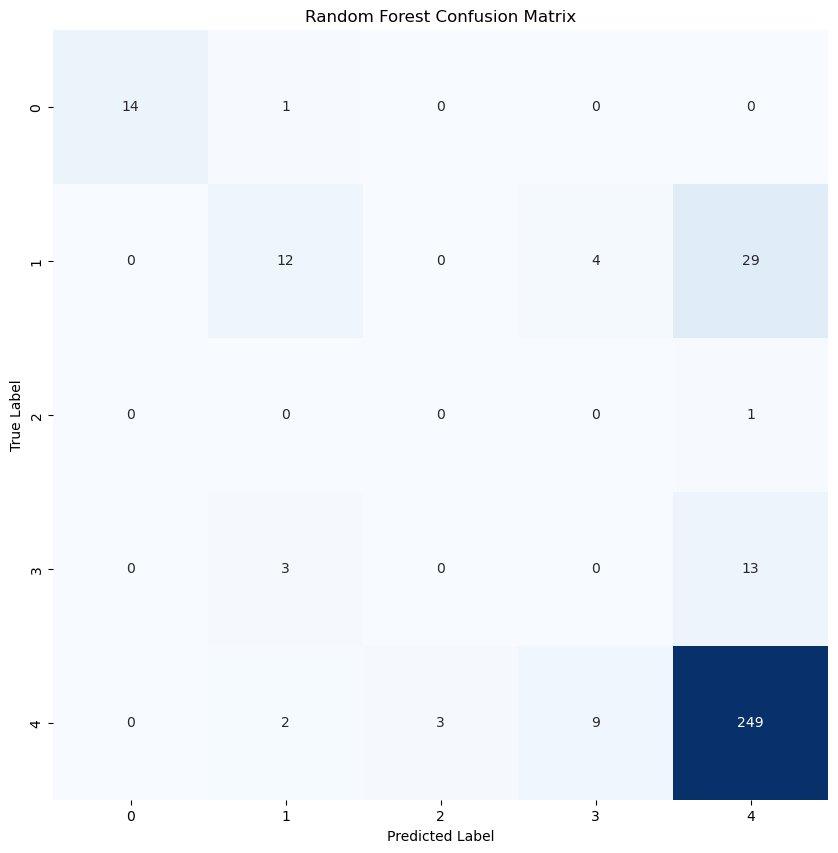

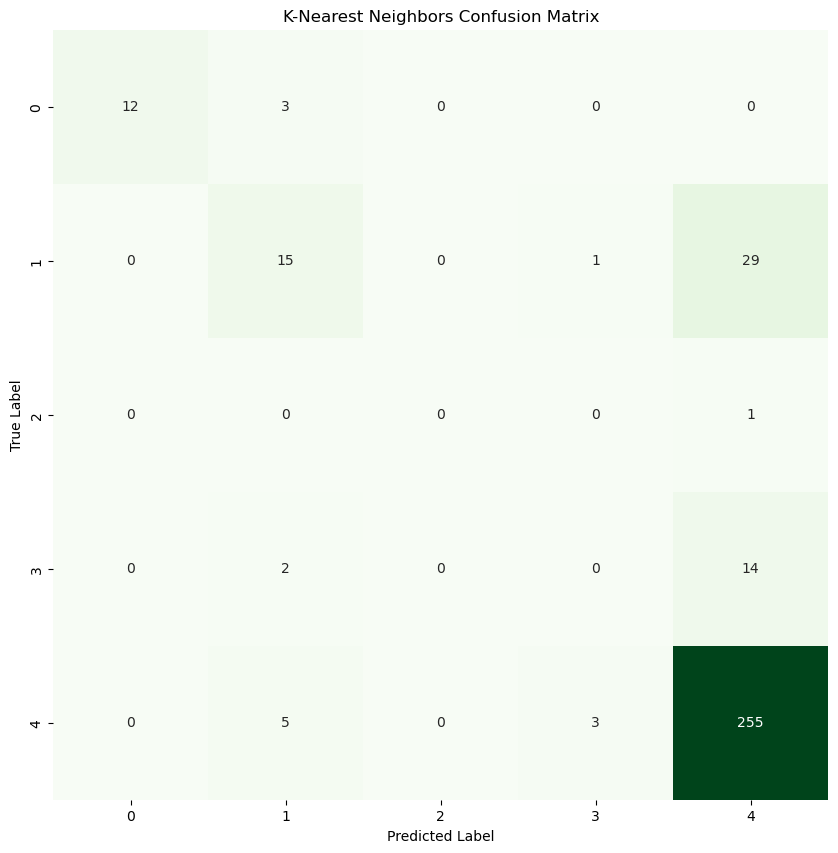

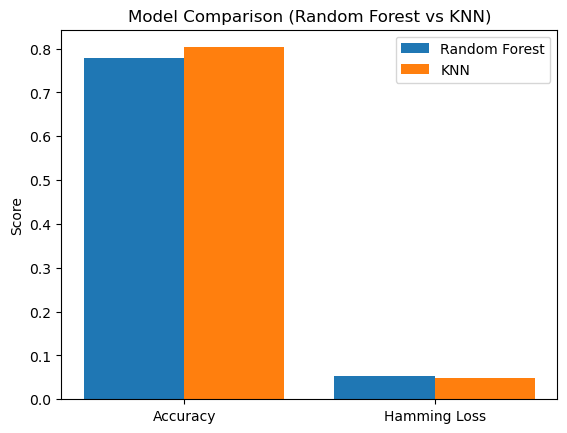

In [77]:
from sklearn.metrics import (
    accuracy_score,
    hamming_loss,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# Step 11: Evaluate both models
print("\nRandom Forest Model Metrics:")
for i, disease in enumerate(mlb.classes_):
    print(f"Classification Report for {disease}:")
    print(classification_report(y_test[disease], y_pred_rf[:, i], zero_division=0))
    print("=" * 50)

print("\nK-Nearest Neighbors Model Metrics:")
for i, disease in enumerate(mlb.classes_):
    print(f"Classification Report for {disease}:")
    print(classification_report(y_test[disease], y_pred_knn[:, i], zero_division=0))
    print("=" * 50)

# Step 12: Aggregate metrics for both models
print("\nAggregated Metrics for Random Forest:")
precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(
    y_test, y_pred_rf, average=None, zero_division=0
)
for i, disease in enumerate(mlb.classes_):
    print(f"{disease} - Precision: {precision_rf[i]:.2f}, Recall: {recall_rf[i]:.2f}, F1 Score: {f1_rf[i]:.2f}")

print("\nAggregated Metrics for K-Nearest Neighbors:")
precision_knn, recall_knn, f1_knn, _ = precision_recall_fscore_support(
    y_test, y_pred_knn, average=None, zero_division=0
)
for i, disease in enumerate(mlb.classes_):
    print(f"{disease} - Precision: {precision_knn[i]:.2f}, Recall: {recall_knn[i]:.2f}, F1 Score: {f1_knn[i]:.2f}")

# Exact match accuracy
exact_match_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Exact Match Accuracy (Random Forest): {exact_match_accuracy_rf:.2f}")

exact_match_accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Exact Match Accuracy (KNN): {exact_match_accuracy_knn:.2f}")

# Hamming Loss
hamming_loss_rf = hamming_loss(y_test, y_pred_rf)
hamming_loss_knn = hamming_loss(y_test, y_pred_knn)

print(f"Hamming Loss (Random Forest): {hamming_loss_rf:.2f}")
print(f"Hamming Loss (KNN): {hamming_loss_knn:.2f}")

# Step 13: Confusion Matrix for Random Forest
matrix_rf = confusion_matrix(y_test.values.argmax(axis=1), y_pred_rf.argmax(axis=1))
plt.figure(figsize=(10, 10))
sns.heatmap(matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Step 14: Confusion Matrix for KNN
matrix_knn = confusion_matrix(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1))
plt.figure(figsize=(10, 10))
sns.heatmap(matrix_knn, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.show()

# Step 15: Bar Graph Comparison of Accuracy and Hamming Loss
metrics = ['Accuracy', 'Hamming Loss']
rf_values = [exact_match_accuracy_rf, hamming_loss_rf]
knn_values = [exact_match_accuracy_knn, hamming_loss_knn]

x = range(len(metrics))
plt.bar(x, rf_values, width=0.4, label='Random Forest', align='center')
plt.bar([i + 0.4 for i in x], knn_values, width=0.4, label='KNN', align='center')

plt.xticks([i + 0.2 for i in x], metrics)
plt.ylabel('Score')
plt.title('Model Comparison (Random Forest vs KNN)')
plt.legend()
plt.show()


In [78]:
import plotly.graph_objects as go

# Step 13: Visualize the metrics for K-Nearest Neighbors
fig = go.Figure()

# Add precision, recall, and F1 score for KNN
fig.add_trace(go.Bar(
    x=mlb.classes_,
    y=precision_knn,
    name='KNN Precision',
    marker_color='blue'
))
fig.add_trace(go.Bar(
    x=mlb.classes_,
    y=recall_knn,
    name='KNN Recall',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=mlb.classes_,
    y=f1_knn,
    name='KNN F1 Score',
    marker_color='purple'
))

# Step 14: Visualize the metrics for Random Forest
fig.add_trace(go.Bar(
    x=mlb.classes_,
    y=precision_rf,
    name='RF Precision',
    marker_color='orange'
))
fig.add_trace(go.Bar(
    x=mlb.classes_,
    y=recall_rf,
    name='RF Recall',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=mlb.classes_,
    y=f1_rf,
    name='RF F1 Score',
    marker_color='brown'
))

# Step 15: Customize the layout
fig.update_layout(
    title='Performance Metrics for KNN and Random Forest Models',
    xaxis_title='Disease',
    yaxis_title='Metric Value',
    barmode='group',  # Group bars side by side for easy comparison
    legend_title='Metric Type',
    xaxis_tickangle=45
)

# Step 16: Show the plot
fig.show()


In [79]:
import numpy as np

# Step 17: Calculate overall average metrics for both models
avg_precision_knn = np.mean(precision_knn)
avg_recall_knn = np.mean(recall_knn)
avg_f1_knn = np.mean(f1_knn)

avg_precision_rf = np.mean(precision_rf)
avg_recall_rf = np.mean(recall_rf)
avg_f1_rf = np.mean(f1_rf)

# Step 18: Visualize overall performance comparison
fig = go.Figure()

# Add bars for KNN model
fig.add_trace(go.Bar(
    x=['Precision', 'Recall', 'F1 Score'],
    y=[avg_precision_knn, avg_recall_knn, avg_f1_knn],
    name='KNN',
    marker_color='blue'
))

# Add bars for Random Forest model
fig.add_trace(go.Bar(
    x=['Precision', 'Recall', 'F1 Score'],
    y=[avg_precision_rf, avg_recall_rf, avg_f1_rf],
    name='Random Forest',
    marker_color='orange'
))

# Step 19: Customize the layout
fig.update_layout(
    title='Overall Performance Comparison of KNN and Random Forest Models',
    xaxis_title='Metric',
    yaxis_title='Average Metric Value',
    barmode='group',  # Grouped bars for easy comparison
    legend_title='Model'
)

# Step 20: Show the plot
fig.show()


In [80]:
def make_prediction(weight, activity_level, dietary_preference, calorie_target):
    # Step 22: Prepare the input data as a DataFrame with proper column names
    input_data = pd.DataFrame({
        'Weight': [weight],
        'Daily Calorie Target': [calorie_target],
        'Activity Level': [activity_level],
        'Dietary Preference': [dietary_preference]
    })

    # Step 23: One-hot encode the categorical features using column names
    encoded_input = encoder.transform(input_data[['Activity Level', 'Dietary Preference']])
    encoded_input_df = pd.DataFrame(encoded_input, columns=encoded_feature_names)

    # Step 24: Combine numerical and encoded features
    final_input = pd.concat([input_data.drop(columns=['Activity Level', 'Dietary Preference']), encoded_input_df], axis=1)

    # Step 25: Ensure all columns match the training data
    missing_cols = set(X.columns) - set(final_input.columns)
    for col in missing_cols:
        final_input[col] = 0  # Add missing columns with 0 values
    final_input = final_input[X.columns]  # Ensure column order matches

    # Step 26: Make predictions using KNN (you can switch to Random Forest if needed)
    prediction = model_knn.predict(final_input)

    # Step 27: Interpret the prediction
    predicted_diseases = [mlb.classes_[i] for i, val in enumerate(prediction[0]) if val == 1]

    return predicted_diseases



In [81]:
# Example Usage
sample_weight = 70  # Example weight
sample_activity_level = 'Moderate'  # Example activity level
sample_dietary_preference = 'Vegetarian'  # Example dietary preference
sample_calorie_target = 2000  # Example calorie target

predicted_diseases = make_prediction(sample_weight, sample_activity_level, sample_dietary_preference, sample_calorie_target)
print(f"Predicted Diseases: {predicted_diseases}")


Predicted Diseases: ['Weight Gain']



Random Forest Model:
Accuracy: 0.78
Hamming Loss: 0.05
Precision: 0.69, Recall: 0.56, F1 Score: 0.61

K-Nearest Neighbors Model:
Accuracy: 0.80
Hamming Loss: 0.05
Precision: 0.72, Recall: 0.54, F1 Score: 0.61


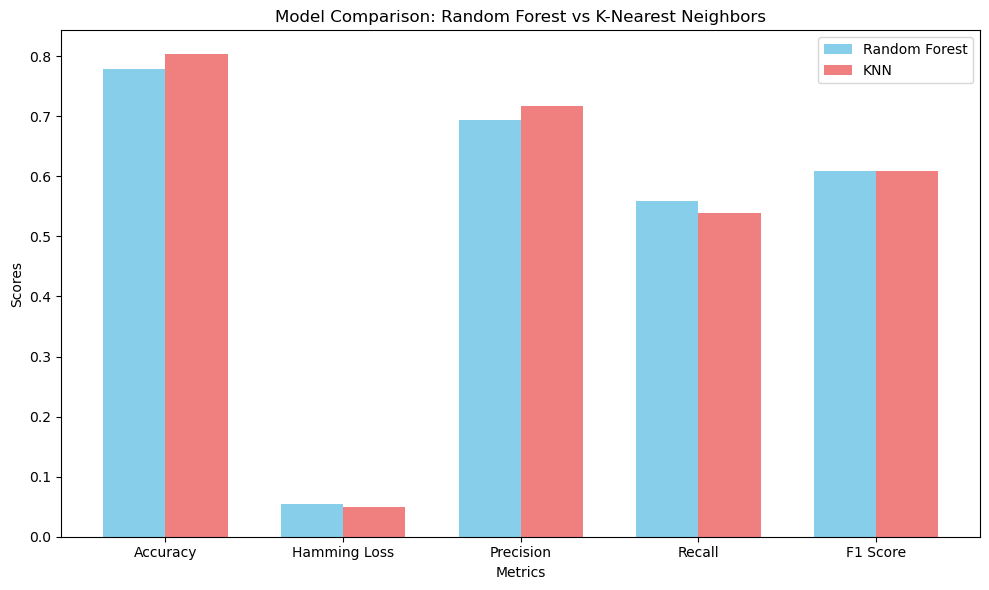

In [82]:

# Step 1: Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
hamming_rf = hamming_loss(y_test, y_pred_rf)
precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='macro', zero_division=0)

# Step 2: Evaluate KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
hamming_knn = hamming_loss(y_test, y_pred_knn)
precision_knn, recall_knn, f1_knn, _ = precision_recall_fscore_support(y_test, y_pred_knn, average='macro', zero_division=0)

# Step 3: Print metrics for both models
print("\nRandom Forest Model:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Hamming Loss: {hamming_rf:.2f}")
print(f"Precision: {precision_rf:.2f}, Recall: {recall_rf:.2f}, F1 Score: {f1_rf:.2f}")

print("\nK-Nearest Neighbors Model:")
print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Hamming Loss: {hamming_knn:.2f}")
print(f"Precision: {precision_knn:.2f}, Recall: {recall_knn:.2f}, F1 Score: {f1_knn:.2f}")

# Step 4: Compare metrics visually using bar charts
import matplotlib.pyplot as plt
import numpy as np

# Metrics
metrics = ['Accuracy', 'Hamming Loss', 'Precision', 'Recall', 'F1 Score']
rf_metrics = [accuracy_rf, hamming_rf, precision_rf, recall_rf, f1_rf]
knn_metrics = [accuracy_knn, hamming_knn, precision_knn, recall_knn, f1_knn]

# Bar chart
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, rf_metrics, width, label='Random Forest', color='skyblue')
plt.bar(x + width/2, knn_metrics, width, label='KNN', color='lightcoral')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Comparison: Random Forest vs K-Nearest Neighbors')
plt.xticks(x, metrics)
plt.legend()
plt.tight_layout()
plt.show()
